Image dimensions: 265 x 397


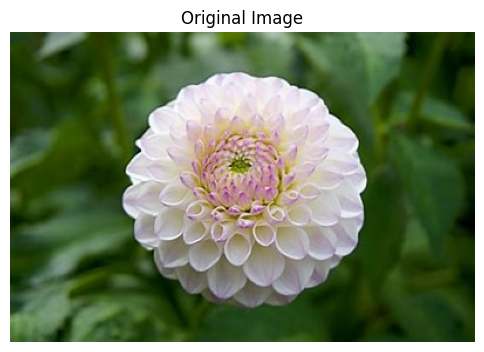

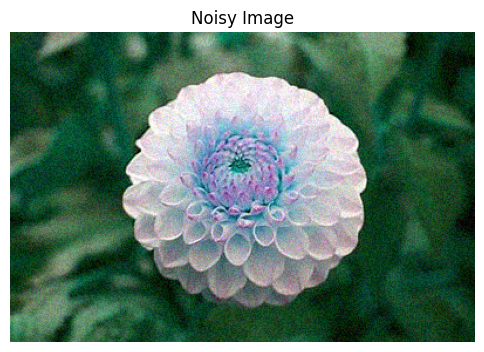

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# 1. Download and Load the Image
image_url = "https://th.bing.com/th?id=OIP.YEe7jjvj3XtaZgPXX7JJ7QHaE8&w=306&h=204&c=8&rs=1&qlt=90&o=6&dpr=1.3&pid=3.1&rm=2"

response = requests.get(image_url)
if response.status_code == 200:
    img_pil = Image.open(BytesIO(response.content))  # Open image
    ImJPG = np.array(img_pil)  # Convert to NumPy array
else:
    print("Failed to download the image.")
    exit()

# Convert to OpenCV format (BGR)
ImJPG = cv2.cvtColor(ImJPG, cv2.COLOR_RGB2BGR)

# Get dimensions
m, n, _ = ImJPG.shape
print(f"Image dimensions: {m} x {n}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(ImJPG, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.axis('off')
plt.title('Original Image')
plt.show()

# 2. Add Noise to the Image
noise = 50 * (np.random.rand(m, n, 3) - 0.5)  # Generate noise
ImJPG_Noisy = np.clip(np.double(ImJPG) + noise, 0, 255)  # Add noise and clip values

# Display Noisy Image
plt.figure(figsize=(6, 6))
plt.imshow(np.uint8(ImJPG_Noisy))  # Convert back to uint8 for display
plt.axis('off')
plt.title('Noisy Image')
plt.show()


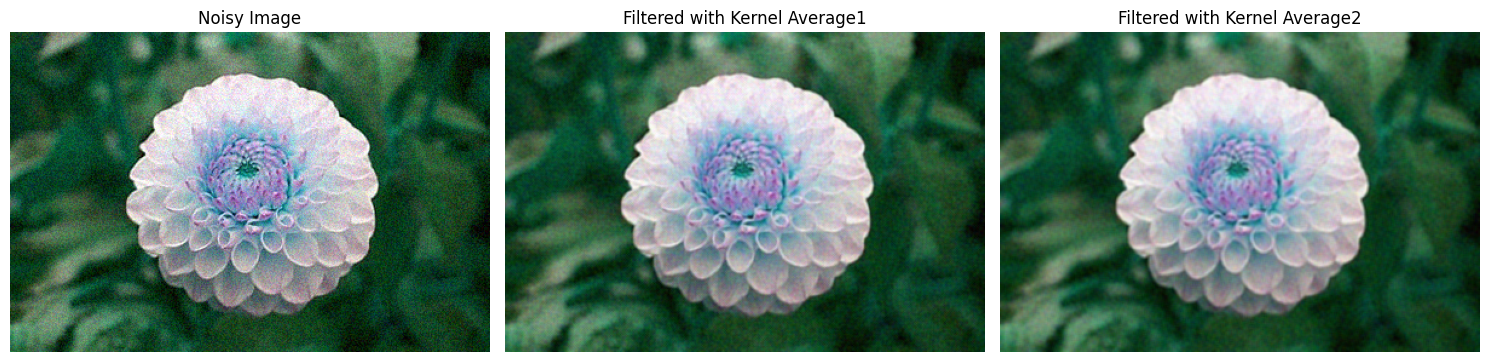

In [4]:

# 3-4. Define averaging kernels
Kernel_Average1 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]) / 5

Kernel_Average2 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

# 5. Apply averaging filters to the noisy image
# Initialize arrays to store filtered results
ImJPG_Average1 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)
ImJPG_Average2 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

# Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Average1[:, :, channel] = convolve2d(
        ImJPG_Noisy[:, :, channel],
        Kernel_Average1,
        mode='same',
        boundary='symm'
    )
    ImJPG_Average2[:, :, channel] = convolve2d(
        ImJPG_Noisy[:, :, channel],
        Kernel_Average2,
        mode='same',
        boundary='symm'
    )

# Convert the results back to uint8 format for display
ImJPG_Average1 = np.uint8(np.clip(ImJPG_Average1, 0, 255))
ImJPG_Average2 = np.uint8(np.clip(ImJPG_Average2, 0, 255))

# Display the resulting images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(np.clip(ImJPG_Noisy, 0, 255)))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Average1)
plt.title('Filtered with Kernel Average1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Average2)
plt.title('Filtered with Kernel Average2')
plt.axis('off')

plt.tight_layout()
plt.show()

Kernel Gauss:
[[0.    0.125 0.   ]
 [0.125 0.5   0.125]
 [0.    0.125 0.   ]]


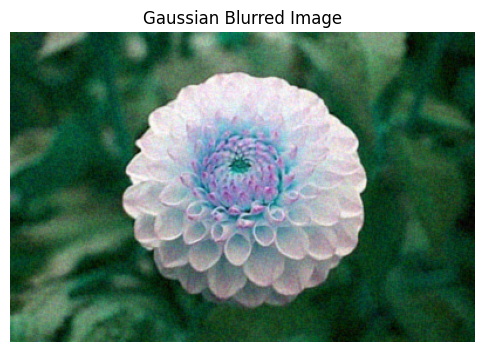

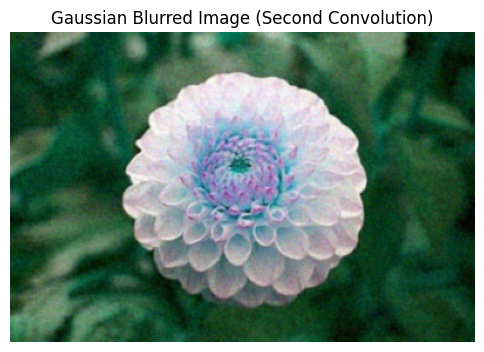

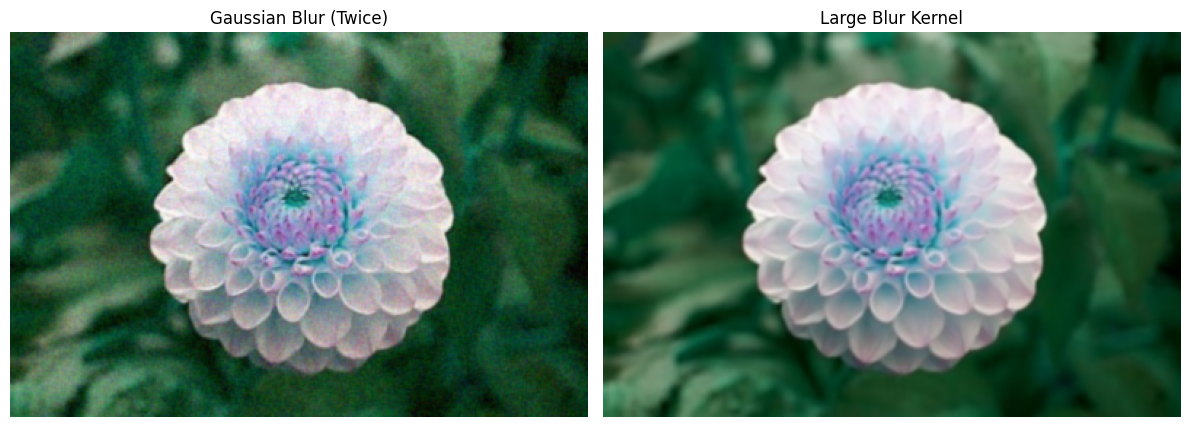

In [5]:
Kernel_Gauss = np.array([
    [0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]
]) / 8

print("Kernel Gauss:")
print(Kernel_Gauss)

# 7. Apply Gaussian blur to the noisy image
ImJPG_Gauss = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

# Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Gauss[:, :, channel] = convolve2d(
        ImJPG_Noisy[:, :, channel],
        Kernel_Gauss,
        mode='same',
        boundary='symm'
    )

# Convert the results back to uint8 format for display
ImJPG_Gauss = np.uint8(np.clip(ImJPG_Gauss, 0, 255))

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG_Gauss)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

# 8. Apply Gaussian blur twice
ImJPG_Gauss2 = np.zeros_like(ImJPG_Gauss, dtype=np.float64)

for channel in range(3):
    ImJPG_Gauss2[:, :, channel] = convolve2d(
        ImJPG_Gauss[:, :, channel],
        Kernel_Gauss,
        mode='same',
        boundary='symm'
    )

ImJPG_Gauss2 = np.uint8(np.clip(ImJPG_Gauss2, 0, 255))

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blurred Image (Second Convolution)')
plt.axis('off')
plt.show()

# 9. Define and apply larger blur kernel
Kernel_Large = np.array([
    [0, 1, 2, 1, 0],
    [1, 4, 8, 4, 1],
    [2, 8, 16, 8, 2],
    [1, 4, 8, 4, 1],
    [0, 1, 2, 1, 0]
]) / 80

# Apply the larger blur kernel to the image
ImJPG_Large = np.zeros_like(ImJPG, dtype=np.float64)

for channel in range(3):
    ImJPG_Large[:, :, channel] = convolve2d(
        ImJPG[:, :, channel],
        Kernel_Large,
        mode='same',
        boundary='symm'
    )

ImJPG_Large = np.uint8(np.clip(ImJPG_Large, 0, 255))

# Display the resulting images
plt.figure(figsize=(12, 5))
# Display Gaussian blurred image (second convolution)
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blur (Twice)')
plt.axis('off')

# Display larger blur image
plt.subplot(1, 2, 2)
plt.imshow(ImJPG_Large)
plt.title('Large Blur Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()

Kernel Sharp1:
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Kernel Sharp2:
 [[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


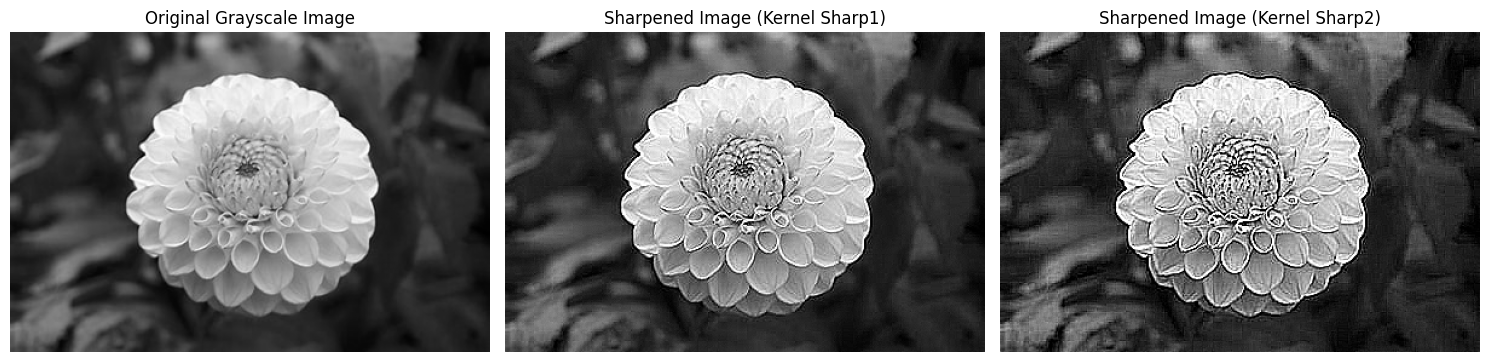

In [6]:
# 10. Define sharpening kernels
Kernel_Sharp1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

Kernel_Sharp2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

print("Kernel Sharp1:\n", Kernel_Sharp1)
print("\nKernel Sharp2:\n", Kernel_Sharp2)

# 11. Apply sharpening filters to the original image
# Make a copy of the original image
ImJPG_Original = ImJPG.copy()

# Convert to grayscale for sharpening demonstration
ImJPG_Gray = np.mean(ImJPG_Original, axis=2).astype(np.uint8)

# Apply convolution with Kernel_Sharp1
ImJPG_Sharp1 = convolve2d(ImJPG_Gray, Kernel_Sharp1, mode='same', boundary='symm')

# Apply convolution with Kernel_Sharp2
ImJPG_Sharp2 = convolve2d(ImJPG_Gray, Kernel_Sharp2, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Sharp1 = np.clip(ImJPG_Sharp1, 0, 255).astype(np.uint8)
ImJPG_Sharp2 = np.clip(ImJPG_Sharp2, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG_Gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sharp1, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sharp2, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp2)')
plt.axis('off')

plt.tight_layout()
plt.show()


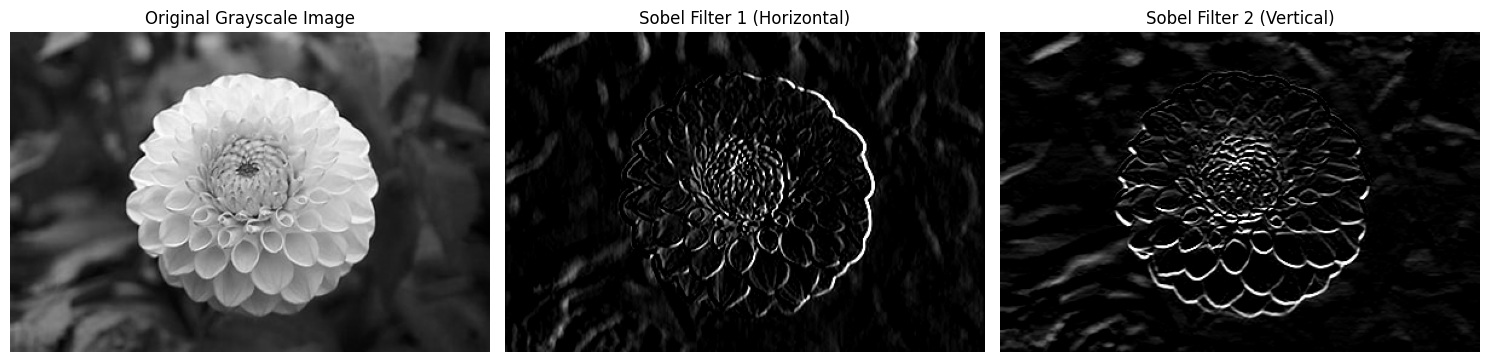

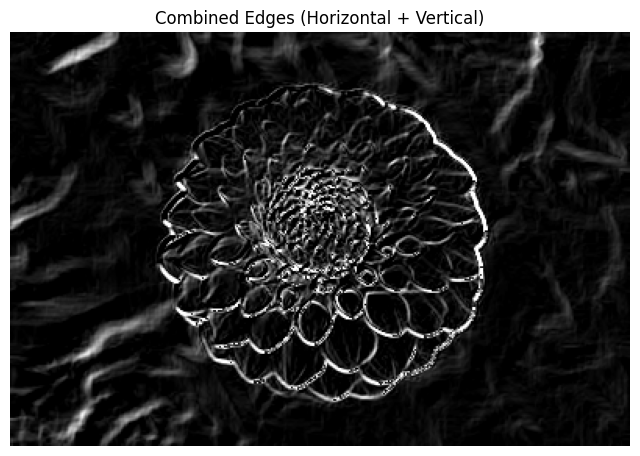

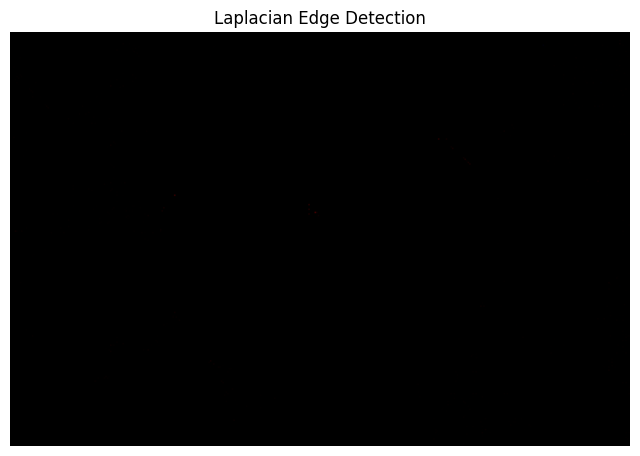

In [7]:
Kernel_Sobel1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

Kernel_Sobel2 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Perform convolution with Sobel kernels
ImJPG_Sobel1 = convolve2d(ImJPG_Gray, Kernel_Sobel1, mode='same', boundary='symm')
ImJPG_Sobel2 = convolve2d(ImJPG_Gray, Kernel_Sobel2, mode='same', boundary='symm')

# Clip and convert the results back to uint8 for display
ImJPG_Sobel1 = np.uint8(np.clip(ImJPG_Sobel1, 0, 255))
ImJPG_Sobel2 = np.uint8(np.clip(ImJPG_Sobel2, 0, 255))

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG_Gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sobel1, cmap='gray')
plt.title('Sobel Filter 1 (Horizontal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sobel2, cmap='gray')
plt.title('Sobel Filter 2 (Vertical)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 14. Combine horizontal and vertical edge images
ImJPG_SobelCombined = ImJPG_Sobel1 + ImJPG_Sobel2

# Clip and convert the combined result back to uint8 for display
ImJPG_SobelCombined = np.uint8(np.clip(ImJPG_SobelCombined, 0, 255))

# Display the combined edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_SobelCombined, cmap='gray')
plt.title('Combined Edges (Horizontal + Vertical)')
plt.axis('off')
plt.show()

# 15-16. Define and apply Laplacian edge detection
# Define Laplace kernel
Kernel_Laplace = np.array([
    [0, -3, 0],
    [-1, 4, -3],
    [0, -2, 0]
])

# Apply convolution with Laplace kernel to each channel separately
ImJPG_RGB = ImJPG.copy()  # Ensure we're using the original RGB image
ImJPG_Laplace = np.zeros_like(ImJPG_RGB, dtype=np.float64)

for channel in range(3):
    ImJPG_Laplace[:, :, channel] = convolve2d(
        ImJPG_RGB[:, :, channel],
        Kernel_Laplace,
        mode='same',
        boundary='symm'
    )

# Clip and convert the result back to uint8 for display
ImJPG_Laplace = np.uint8(np.clip(ImJPG_Laplace, 0, 255))

# Display the Laplacian edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_Laplace)
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()